In [1]:
import os
import random

import numpy as np
import pandas as pd

from skimage import io

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pytorch
import torch, torchvision, torch.utils
from torch import Tensor
from torch import cat
from torch.autograd.grad_mode import no_grad
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss, BCELoss, CrossEntropyLoss, MSELoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)

import torch.nn.functional as F
from torchviz import make_dot
from torchsummary import summary
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,RocCurveDisplay,classification_report,precision_score,recall_score,f1_score
import time


In [3]:
def matrix_confusion(yt, yp,time_taken):
    data = {'Y_Real': yt,
            'Y_Pred': yp}

    df = pd.DataFrame(data, columns=['Y_Real','Y_Pred'])
    confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Pred'], rownames=['Real'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, fmt='g')

    plt.show()
    y_val = df['Y_Real'].to_numpy()
    predictions = df['Y_Pred'].to_numpy()
    accuracy = accuracy_score(y_val,predictions)
    precision = precision_score(y_val,predictions)
    recall = recall_score(y_val,predictions)
    f1 = f1_score(y_val,predictions)
    print('Time taken: ',time_taken)
    print('Test size:',len(y_val))
    print('Total Accuracy: ',accuracy)
    print('Total Precision: ',precision)
    print('Total Recall: ',recall)
    print('Total F1 Score: ',f1)
    print("Classification Report:\n")
    print(classification_report(y_val,predictions))


    return time_taken,accuracy,precision,recall,f1

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.cuda.empty_cache()

In [6]:
train_data = torchvision.datasets.ImageFolder('C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Data/train', transform=transforms.Compose([transforms.ToTensor()]))
test_data = torchvision.datasets.ImageFolder('C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Data/test', transform=transforms.Compose([transforms.ToTensor()]))
valid_data = torchvision.datasets.ImageFolder('C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Data/valid', transform=transforms.Compose([transforms.ToTensor()]))

In [7]:
train_data[0][0].shape

torch.Size([3, 640, 640])

In [8]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=8)
test_loader = DataLoader(valid_data, shuffle=True, batch_size=1)
hold_out_test_loader = DataLoader(test_data, shuffle=True, batch_size=1)

In [9]:
# Normal (0) and True, Pneumonia (1)
print((train_loader.dataset.class_to_idx))
print((test_loader.dataset.class_to_idx))
print((hold_out_test_loader.dataset.class_to_idx))

{'NORMAL': 0, 'PNEUMONIA': 1}
{'NORMAL': 0, 'PNEUMONIA': 1}
{'NORMAL': 0, 'PNEUMONIA': 1}


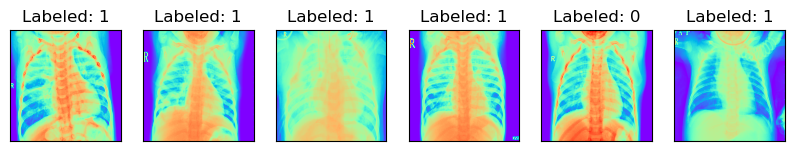

In [10]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 10))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap=plt.cm.rainbow)
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title(f"Labeled: {targets[0].item()}")

    n_samples_show -= 1

In [11]:
class Net2(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(3, 128, kernel_size=5)
        self.conv2 = Conv2d(128, 128, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(3155072, 128)
        self.fc2 = Linear(128, 2)
        self.fc3 = Linear(2,1) # Replacing quantum circuit with linear
        self.fc4 = Linear(1, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2,2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)  # QNN in foward section
        x = self.fc4(x)
        return cat((x, 1 - x), -1)

model2 = Net2()

In [12]:
class Net3(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(3, 128, kernel_size=5)
        self.conv2 = Conv2d(128, 128, kernel_size=5)
        self.conv3 = Conv2d(128,128,kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(739328, 128)
        self.fc2 = Linear(128, 2)
        self.fc3 = Linear(2,1) # Replacing quantum circuit with linear
        self.fc4 = Linear(1, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2,2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)  # QNN in foward section
        x = self.fc4(x)
        return cat((x, 1 - x), -1)

model3 = Net3()

In [13]:
class Net4(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(3, 128, kernel_size=5)
        self.conv2 = Conv2d(128, 128, kernel_size=5)
        self.conv3 = Conv2d(128,128,kernel_size=5)
        self.conv4 = Conv2d(128,128,kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(165888, 128)
        self.fc2 = Linear(128, 2)
        self.fc3 = Linear(2,1) # Replacing quantum circuit with linear
        self.fc4 = Linear(1, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2,2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)  # QNN in foward section
        x = self.fc4(x)
        return cat((x, 1 - x), -1)

model4 = Net4()

In [14]:
class Net5(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(3, 128, kernel_size=5)
        self.conv2 = Conv2d(128, 128, kernel_size=5)
        self.conv3 = Conv2d(128,128,kernel_size=5)
        self.conv4 = Conv2d(128,128,kernel_size=5)
        self.conv5 = Conv2d(128,128,kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(32768, 128)
        self.fc2 = Linear(128, 2)
        self.fc3 = Linear(2,1) # Replacing quantum circuit with linear
        self.fc4 = Linear(1, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x, 2,2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)  # QNN in foward section
        x = self.fc4(x)
        return cat((x, 1 - x), -1)

model5 = Net5()

In [15]:
class Net6(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(3, 128, kernel_size=5)
        self.conv2 = Conv2d(128, 128, kernel_size=5)
        self.conv3 = Conv2d(128,128,kernel_size=5)
        self.conv4 = Conv2d(128,128,kernel_size=5)
        self.conv5 = Conv2d(128,128,kernel_size=5)
        self.conv6 = Conv2d(128,128,kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(4608, 128)
        self.fc2 = Linear(128, 2)
        self.fc3 = Linear(2,1) # Replacing quantum circuit with linear
        self.fc4 = Linear(1, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv6(x))
        x = F.max_pool2d(x, 2,2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)  # QNN in foward section
        x = self.fc4(x)
        return cat((x, 1 - x), -1)

model6 = Net6()

In [16]:
class Net7(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(3, 128, kernel_size=5)
        self.conv2 = Conv2d(128, 128, kernel_size=5)
        self.conv3 = Conv2d(128,128,kernel_size=5)
        self.conv4 = Conv2d(128,128,kernel_size=5)
        self.conv5 = Conv2d(128,128,kernel_size=5)
        self.conv6 = Conv2d(128,128,kernel_size=5)
        self.conv7 = Conv2d(128,128,kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(128, 128)
        self.fc2 = Linear(128, 2)
        self.fc3 = Linear(2,1) # Replacing quantum circuit with linear
        self.fc4 = Linear(1, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv6(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv7(x))
        x = F.max_pool2d(x, 2,2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)  # QNN in foward section
        x = self.fc4(x)
        return cat((x, 1 - x), -1)

model7 = Net7()

# Model 3

In [17]:
torch.cuda.empty_cache()

In [18]:
model = model3.to('cuda')

In [19]:
print(model)

Net3(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=739328, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (fc4): Linear(in_features=1, out_features=1, bias=True)
)


In [20]:
summary(model, (3, 640, 640),  device='cuda')

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Dropout2d: 1-4                         [-1, 128, 76, 76]         --
├─Linear: 1-5                            [-1, 128]                 94,634,112
├─Linear: 1-6                            [-1, 2]                   258
├─Linear: 1-7                            [-1, 1]                   3
├─Linear: 1-8                            [-1, 1]                   2
Total params: 95,463,559
Trainable params: 95,463,559
Non-trainable params: 0
Total mult-adds (G): 53.95
Input size (MB): 4.69
Forward/backward pass size (MB): 514.16
Params size (MB): 364.16
Estimated Total Size (MB): 883.01


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Dropout2d: 1-4                         [-1, 128, 76, 76]         --
├─Linear: 1-5                            [-1, 128]                 94,634,112
├─Linear: 1-6                            [-1, 2]                   258
├─Linear: 1-7                            [-1, 1]                   3
├─Linear: 1-8                            [-1, 1]                   2
Total params: 95,463,559
Trainable params: 95,463,559
Non-trainable params: 0
Total mult-adds (G): 53.95
Input size (MB): 4.69
Forward/backward pass size (MB): 514.16
Params size (MB): 364.16
Estimated Total Size (MB): 883.01

In [21]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_func = CrossEntropyLoss().to('cuda')


epochs = 16
model.train()
count = 1
loss_list = []
total_accuracy = []
model_path3 = 'C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Models/CNN_Chest_model3.pt'
tic = time.time()
for epoch in range(epochs):
    correct = 0
    total_loss = []
    batch_size = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        batch_size+=1
        optimizer.zero_grad(set_to_none=True)
        output = model(data.to('cuda'))  # Forward pass, Data to GPU
        loss = loss_func(output, target.to('cuda')) #Labels to GPU
        loss.backward()  # Backward pass
        optimizer.step()
        total_loss.append(loss.item())
        train_pred = output.argmax(dim=1, keepdim=True)
        correct += train_pred.eq(target.to('cuda').view_as(train_pred)).sum().item()
    loss_list.append(sum(total_loss) / len(total_loss))
    accuracy = 100 * correct / 4077 # No. of training examples = 4077
    total_accuracy.append(accuracy)
    if ((100*(epoch+1))//epochs)//(count*10) >0 :
      count+=1
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path3)
    print(f"Training [{100.0 * (epoch + 1) / epochs:.0f}%]\tLoss: {loss_list[-1]:.4f}\tAccuracy: {accuracy:.2f}%")

toc = time.time()

Training [6%]	Loss: 0.3731	Accuracy: 83.32%
Saving model with test loss of 93.034
Training [12%]	Loss: 0.1772	Accuracy: 93.03%
Training [19%]	Loss: 0.1528	Accuracy: 94.19%
Saving model with test loss of 94.702
Training [25%]	Loss: 0.1415	Accuracy: 94.70%
Saving model with test loss of 95.708
Training [31%]	Loss: 0.1201	Accuracy: 95.71%
Training [38%]	Loss: 0.1109	Accuracy: 95.68%
Saving model with test loss of 96.787
Training [44%]	Loss: 0.0972	Accuracy: 96.79%
Saving model with test loss of 96.517
Training [50%]	Loss: 0.0899	Accuracy: 96.52%
Training [56%]	Loss: 0.0749	Accuracy: 97.42%
Saving model with test loss of 97.817
Training [62%]	Loss: 0.0591	Accuracy: 97.82%
Training [69%]	Loss: 0.0573	Accuracy: 97.99%
Saving model with test loss of 98.479
Training [75%]	Loss: 0.0409	Accuracy: 98.48%
Saving model with test loss of 98.725
Training [81%]	Loss: 0.0320	Accuracy: 98.72%
Training [88%]	Loss: 0.0217	Accuracy: 99.19%
Saving model with test loss of 99.043
Training [94%]	Loss: 0.0263	A

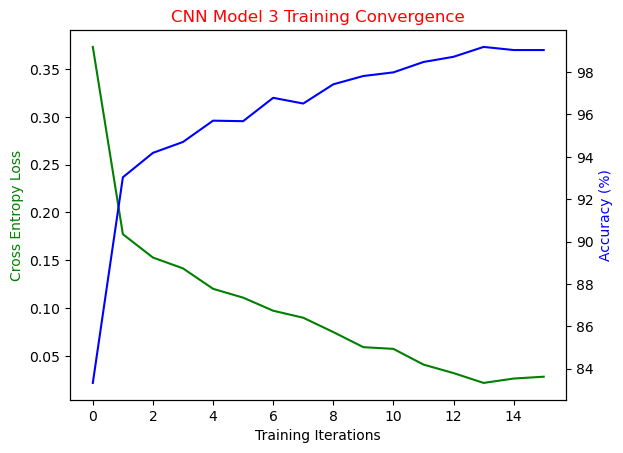

In [22]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, 'g-')
ax2 = ax1.twinx()
ax2.plot(total_accuracy, 'b')
plt.title("CNN Model 3 Training Convergence", color='red')
ax1.set_xlabel("Training Iterations")
ax1.set_ylabel("Cross Entropy Loss", color='g')
ax2.set_ylabel("Accuracy (%)", color='b')
plt.show()

In [23]:
torch.save(model.state_dict(), model_path3)

In [25]:
model_temp = Net3()
model_temp.load_state_dict(torch.load(model_path3))
model_temp= model_temp.to('cuda')

In [26]:
batch_size=1

model_temp.eval()
pred_targets = []
test_targets= []
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model_temp(data.to('cuda'))
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)
        pred = output.argmax(dim=1, keepdim=True)
        pred_targets.append(pred.item())
        test_targets.append(target.item())
        correct += pred.eq(target.to('cuda').view_as(pred)).sum().item()

        loss = loss_func(output, target.to('cuda'))
        total_loss.append(loss.item())

    print(f"Performance on test data:\n\tLoss: {sum(total_loss) / len(total_loss):.4f}\n\tAccuracy: {100 * correct / len(test_loader) / batch_size:.2f}%")
    print(test_targets)
    print(pred_targets)

Performance on test data:
	Loss: 0.1295
	Accuracy: 95.97%
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

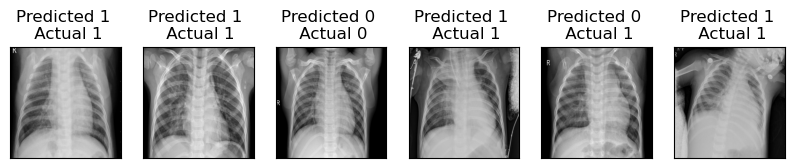

In [27]:
from PIL import Image
#abc
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model_temp.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model_temp(data.to('cuda')[0:1])
        if len(output.shape) == 1:
            output = output.reshape(3, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        test_targets2 = target.item()
        axes[count].imshow(torchvision.transforms.ToPILImage(mode='RGB')(data[0].squeeze()), cmap=plt.cm.rainbow)

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {} \n Actual {}".format(pred.item(),test_targets2))

        count += 1

In [28]:
time_taken = toc-tic

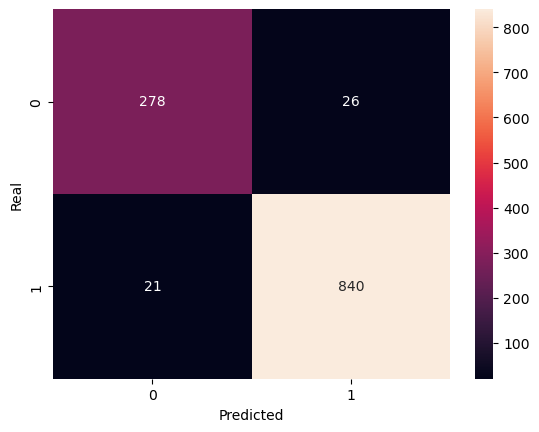

Time taken:  10939.655207633972
Test size: 1165
Total Accuracy:  0.959656652360515
Total Precision:  0.9699769053117783
Total Recall:  0.975609756097561
Total F1 Score:  0.9727851766068326
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       304
           1       0.97      0.98      0.97       861

    accuracy                           0.96      1165
   macro avg       0.95      0.95      0.95      1165
weighted avg       0.96      0.96      0.96      1165



In [29]:
val_CNN3 = matrix_confusion(test_targets, pred_targets,time_taken)

In [30]:
out3 = pd.DataFrame([val_CNN3],
                   index = ['CNN Model 3'],
                  columns=['Time','Accuracy','Precision','Recall','F1 score'])
out3.sort_values('Time')

,Time,Accuracy,Precision,Recall,F1 score
CNN Model 3,10939.655208,0.959657,0.969977,0.97561,0.972785


# Model 4

In [31]:
torch.cuda.empty_cache()

In [32]:
model = model4.to('cuda')

In [33]:
print(model)

Net4(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=165888, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (fc4): Linear(in_features=1, out_features=1, bias=True)
)


In [34]:
summary(model, (3, 640, 640),  device='cuda')

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Conv2d: 1-4                            [-1, 128, 72, 72]         409,728
├─Dropout2d: 1-5                         [-1, 128, 36, 36]         --
├─Linear: 1-6                            [-1, 128]                 21,233,792
├─Linear: 1-7                            [-1, 2]                   258
├─Linear: 1-8                            [-1, 1]                   3
├─Linear: 1-9                            [-1, 1]                   2
Total params: 22,472,967
Trainable params: 22,472,967
Non-trainable params: 0
Total mult-adds (G): 56.00
Input size (MB): 4.69
Forward/backward pass size (MB): 519.22
Params size (MB): 85.73
Estimated Total Size (MB): 609.64


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Conv2d: 1-4                            [-1, 128, 72, 72]         409,728
├─Dropout2d: 1-5                         [-1, 128, 36, 36]         --
├─Linear: 1-6                            [-1, 128]                 21,233,792
├─Linear: 1-7                            [-1, 2]                   258
├─Linear: 1-8                            [-1, 1]                   3
├─Linear: 1-9                            [-1, 1]                   2
Total params: 22,472,967
Trainable params: 22,472,967
Non-trainable params: 0
Total mult-adds (G): 56.00
Input size (MB): 4.69
Forward/backward pass size (MB): 519.22
Params size (MB): 85.73
Estimated Total Size (MB): 609.64

In [35]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_func = CrossEntropyLoss().to('cuda')


epochs = 16
model.train()
count = 1
loss_list = []
total_accuracy = []
model_path4 = 'C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Models/CNN_Chest_model4.pt'
tic = time.time()
for epoch in range(epochs):
    correct = 0
    total_loss = []
    batch_size = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        batch_size+=1
        optimizer.zero_grad(set_to_none=True)
        output = model(data.to('cuda'))  # Forward pass, Data to GPU
        loss = loss_func(output, target.to('cuda')) #Labels to GPU
        loss.backward()  # Backward pass
        optimizer.step()
        total_loss.append(loss.item())
        train_pred = output.argmax(dim=1, keepdim=True)
        correct += train_pred.eq(target.to('cuda').view_as(train_pred)).sum().item()
    loss_list.append(sum(total_loss) / len(total_loss))
    accuracy = 100 * correct / 4077 # No. of training examples = 4077
    total_accuracy.append(accuracy)
    if ((100*(epoch+1))//epochs)//(count*10) >0 :
      count+=1
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path4)
    print(f"Training [{100.0 * (epoch + 1) / epochs:.0f}%]\tLoss: {loss_list[-1]:.4f}\tAccuracy: {accuracy:.2f}%")

toc = time.time()

Training [6%]	Loss: 0.3721	Accuracy: 83.57%
Saving model with test loss of 92.225
Training [12%]	Loss: 0.1998	Accuracy: 92.22%
Training [19%]	Loss: 0.1686	Accuracy: 93.28%
Saving model with test loss of 94.432
Training [25%]	Loss: 0.1559	Accuracy: 94.43%
Saving model with test loss of 95.021
Training [31%]	Loss: 0.1422	Accuracy: 95.02%
Training [38%]	Loss: 0.1321	Accuracy: 95.07%
Saving model with test loss of 95.364
Training [44%]	Loss: 0.1260	Accuracy: 95.36%
Saving model with test loss of 95.855
Training [50%]	Loss: 0.1080	Accuracy: 95.85%
Training [56%]	Loss: 0.1002	Accuracy: 96.27%
Saving model with test loss of 96.198
Training [62%]	Loss: 0.1034	Accuracy: 96.20%
Training [69%]	Loss: 0.0781	Accuracy: 96.91%
Saving model with test loss of 97.277
Training [75%]	Loss: 0.0760	Accuracy: 97.28%
Saving model with test loss of 97.792
Training [81%]	Loss: 0.0652	Accuracy: 97.79%
Training [88%]	Loss: 0.0591	Accuracy: 97.79%
Saving model with test loss of 98.528
Training [94%]	Loss: 0.0427	A

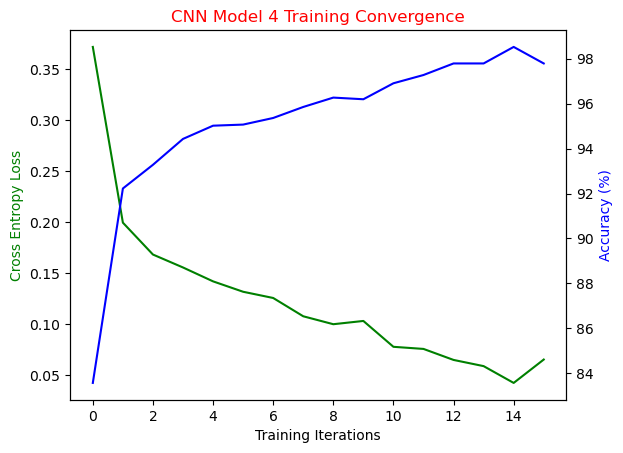

In [36]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, 'g-')
ax2 = ax1.twinx()
ax2.plot(total_accuracy, 'b')
plt.title("CNN Model 4 Training Convergence", color='red')
ax1.set_xlabel("Training Iterations")
ax1.set_ylabel("Cross Entropy Loss", color='g')
ax2.set_ylabel("Accuracy (%)", color='b')
plt.show()

In [37]:
torch.save(model.state_dict(), model_path4)

In [38]:
model_temp = Net4()
model_temp.load_state_dict(torch.load(model_path4))
model_temp= model_temp.to('cuda')

In [39]:
batch_size=1

model_temp.eval()
pred_targets = []
test_targets= []
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model_temp(data.to('cuda'))
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)
        pred = output.argmax(dim=1, keepdim=True)
        pred_targets.append(pred.item())
        test_targets.append(target.item())
        correct += pred.eq(target.to('cuda').view_as(pred)).sum().item()

        loss = loss_func(output, target.to('cuda'))
        total_loss.append(loss.item())

    print(f"Performance on test data:\n\tLoss: {sum(total_loss) / len(total_loss):.4f}\n\tAccuracy: {100 * correct / len(test_loader) / batch_size:.2f}%")
    print(test_targets)
    print(pred_targets)

Performance on test data:
	Loss: 0.1016
	Accuracy: 96.22%
[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,

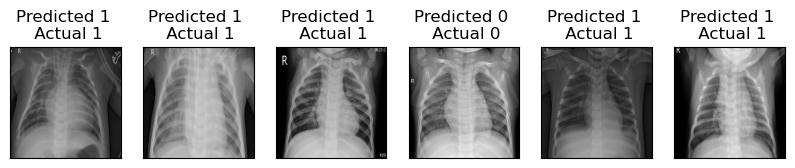

In [40]:
from PIL import Image
#abc
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model_temp.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model_temp(data.to('cuda')[0:1])
        if len(output.shape) == 1:
            output = output.reshape(3, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        test_targets2 = target.item()
        axes[count].imshow(torchvision.transforms.ToPILImage(mode='RGB')(data[0].squeeze()), cmap=plt.cm.rainbow)

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {} \n Actual {}".format(pred.item(),test_targets2))

        count += 1

In [41]:
time_taken = toc-tic

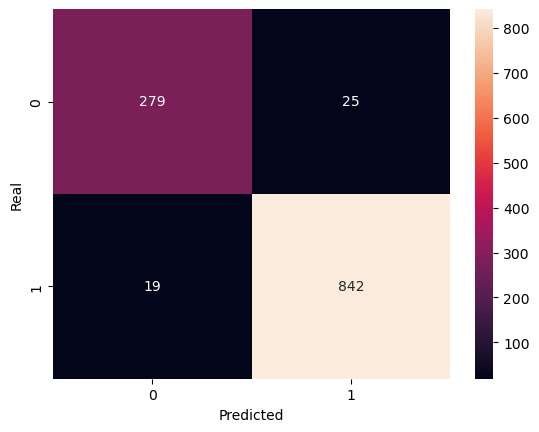

Time taken:  52804.279888153076
Test size: 1165
Total Accuracy:  0.9622317596566523
Total Precision:  0.9711649365628604
Total Recall:  0.9779326364692218
Total F1 Score:  0.974537037037037
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       304
           1       0.97      0.98      0.97       861

    accuracy                           0.96      1165
   macro avg       0.95      0.95      0.95      1165
weighted avg       0.96      0.96      0.96      1165



In [42]:
val_CNN4 = matrix_confusion(test_targets, pred_targets,time_taken)

In [43]:
out4 = pd.DataFrame([val_CNN4],
                   index = ['CNN Model 4'],
                  columns=['Time','Accuracy','Precision','Recall','F1 score'])
out4.sort_values('Time')

,Time,Accuracy,Precision,Recall,F1 score
CNN Model 4,52804.279888,0.962232,0.971165,0.977933,0.974537


# Model 5

In [49]:
torch.cuda.empty_cache()

In [50]:
model = model5.to('cuda')

In [51]:
print(model)

Net5(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (fc4): Linear(in_features=1, out_features=1, bias=True)
)


In [52]:
summary(model, (3, 640, 640),  device='cuda')

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Conv2d: 1-4                            [-1, 128, 72, 72]         409,728
├─Conv2d: 1-5                            [-1, 128, 32, 32]         409,728
├─Dropout2d: 1-6                         [-1, 128, 16, 16]         --
├─Linear: 1-7                            [-1, 128]                 4,194,432
├─Linear: 1-8                            [-1, 2]                   258
├─Linear: 1-9                            [-1, 1]                   3
├─Linear: 1-10                           [-1, 1]                   2
Total params: 5,843,335
Trainable params: 5,843,335
Non-trainable params: 0
Total mult-adds (G): 56.40
Input size (MB): 4.69
Forward/backward pass size (MB): 520.22
Params size (MB): 22.29
Estimat

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Conv2d: 1-4                            [-1, 128, 72, 72]         409,728
├─Conv2d: 1-5                            [-1, 128, 32, 32]         409,728
├─Dropout2d: 1-6                         [-1, 128, 16, 16]         --
├─Linear: 1-7                            [-1, 128]                 4,194,432
├─Linear: 1-8                            [-1, 2]                   258
├─Linear: 1-9                            [-1, 1]                   3
├─Linear: 1-10                           [-1, 1]                   2
Total params: 5,843,335
Trainable params: 5,843,335
Non-trainable params: 0
Total mult-adds (G): 56.40
Input size (MB): 4.69
Forward/backward pass size (MB): 520.22
Params size (MB): 22.29
Estimat

In [53]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_func = CrossEntropyLoss().to('cuda')

testing_for_blast = 1
check_six_percent = 0

epochs = 16
model.train()
count = 1
loss_list = []
total_accuracy = []
model_path5 = 'C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Models/CNN_Chest_model5.pt'
tic = time.time()
for epoch in range(epochs):
    correct = 0
    total_loss = []
    batch_size = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        batch_size+=1
        optimizer.zero_grad(set_to_none=True)
        output = model(data.to('cuda'))  # Forward pass, Data to GPU
        loss = loss_func(output, target.to('cuda')) #Labels to GPU
        loss.backward()  # Backward pass
        optimizer.step()
        total_loss.append(loss.item())
        train_pred = output.argmax(dim=1, keepdim=True)
        correct += train_pred.eq(target.to('cuda').view_as(train_pred)).sum().item()
    loss_list.append(sum(total_loss) / len(total_loss))
    accuracy = 100 * correct / 4077 # No. of training examples = 4077
    total_accuracy.append(accuracy)
    if ((100*(epoch+1))//epochs)//(count*10) >0 :
      count+=1
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path5)
    print(f"Training [{100.0 * (epoch + 1) / epochs:.0f}%]\tLoss: {loss_list[-1]:.4f}\tAccuracy: {accuracy:.2f}%")
    if check_six_percent == 0:
      check_six_percent=1
      print(f"Training [{100.0 * (epoch + 1) / epochs:.2f}%]\t Time Taken: {time.time()-tic:.2f} seconds")
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path5)
    if testing_for_blast == 1:
      break

toc = time.time()

Training [6%]	Loss: 0.3590	Accuracy: 83.81%
Training [6.25%]	 Time Taken: 3392.66 seconds
Saving model with test loss of 83.812


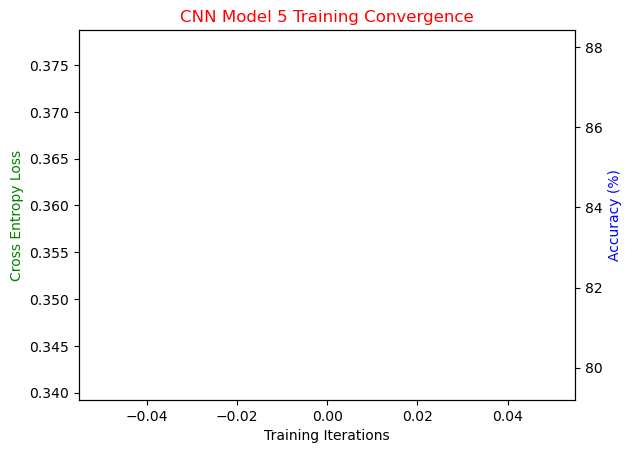

In [54]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, 'g-')
ax2 = ax1.twinx()
ax2.plot(total_accuracy, 'b')
plt.title("CNN Model 5 Training Convergence", color='red')
ax1.set_xlabel("Training Iterations")
ax1.set_ylabel("Cross Entropy Loss", color='g')
ax2.set_ylabel("Accuracy (%)", color='b')
plt.show()

In [55]:
torch.save(model.state_dict(), model_path5)

In [56]:
model_temp = Net5()
model_temp.load_state_dict(torch.load(model_path5))
model_temp= model_temp.to('cuda')

In [57]:
batch_size=1

model_temp.eval()
pred_targets = []
test_targets= []
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model_temp(data.to('cuda'))
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)
        pred = output.argmax(dim=1, keepdim=True)
        pred_targets.append(pred.item())
        test_targets.append(target.item())
        correct += pred.eq(target.to('cuda').view_as(pred)).sum().item()

        loss = loss_func(output, target.to('cuda'))
        total_loss.append(loss.item())

    print(f"Performance on test data:\n\tLoss: {sum(total_loss) / len(total_loss):.4f}\n\tAccuracy: {100 * correct / len(test_loader) / batch_size:.2f}%")
    print(test_targets)
    print(pred_targets)

Performance on test data:
	Loss: 0.3041
	Accuracy: 89.01%
[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

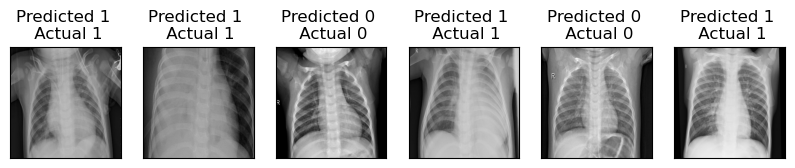

In [58]:
from PIL import Image
#abc
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model_temp.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model_temp(data.to('cuda')[0:1])
        if len(output.shape) == 1:
            output = output.reshape(3, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        test_targets2 = target.item()
        axes[count].imshow(torchvision.transforms.ToPILImage(mode='RGB')(data[0].squeeze()), cmap=plt.cm.rainbow)

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {} \n Actual {}".format(pred.item(),test_targets2))

        count += 1

In [59]:
time_taken = toc-tic

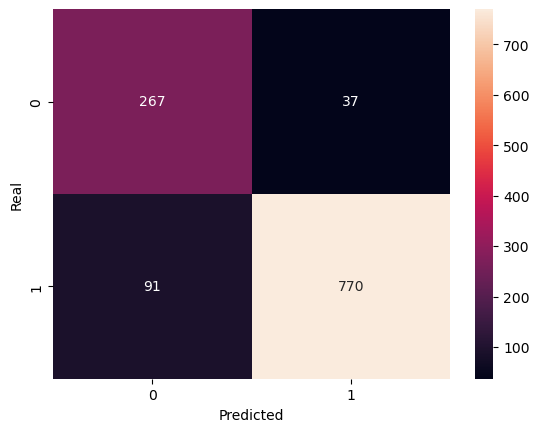

Time taken:  3392.6745812892914
Test size: 1165
Total Accuracy:  0.8901287553648068
Total Precision:  0.9541511771995044
Total Recall:  0.8943089430894309
Total F1 Score:  0.9232613908872901
Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       304
           1       0.95      0.89      0.92       861

    accuracy                           0.89      1165
   macro avg       0.85      0.89      0.86      1165
weighted avg       0.90      0.89      0.89      1165



In [60]:
val_CNN5 = matrix_confusion(test_targets, pred_targets,time_taken)

In [61]:
out5 = pd.DataFrame([val_CNN5],
                   index = ['CNN Model 5'],
                  columns=['Time','Accuracy','Precision','Recall','F1 score'])
out5.sort_values('Time')

,Time,Accuracy,Precision,Recall,F1 score
CNN Model 5,3392.674581,0.890129,0.954151,0.894309,0.923261


# Model 6

In [62]:
torch.cuda.empty_cache()

In [63]:
model = model6.to('cuda')

In [64]:
print(model)

Net6(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=4608, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (fc4): Linear(in_features=1, out_features=1, bias=True)
)


In [65]:
summary(model, (3, 640, 640),  device='cuda')

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Conv2d: 1-4                            [-1, 128, 72, 72]         409,728
├─Conv2d: 1-5                            [-1, 128, 32, 32]         409,728
├─Conv2d: 1-6                            [-1, 128, 12, 12]         409,728
├─Dropout2d: 1-7                         [-1, 128, 6, 6]           --
├─Linear: 1-8                            [-1, 128]                 589,952
├─Linear: 1-9                            [-1, 2]                   258
├─Linear: 1-10                           [-1, 1]                   3
├─Linear: 1-11                           [-1, 1]                   2
Total params: 2,648,583
Trainable params: 2,648,583
Non-trainable params: 0
Total mult-adds (G): 56.46
Input size (MB): 4.6

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Conv2d: 1-4                            [-1, 128, 72, 72]         409,728
├─Conv2d: 1-5                            [-1, 128, 32, 32]         409,728
├─Conv2d: 1-6                            [-1, 128, 12, 12]         409,728
├─Dropout2d: 1-7                         [-1, 128, 6, 6]           --
├─Linear: 1-8                            [-1, 128]                 589,952
├─Linear: 1-9                            [-1, 2]                   258
├─Linear: 1-10                           [-1, 1]                   3
├─Linear: 1-11                           [-1, 1]                   2
Total params: 2,648,583
Trainable params: 2,648,583
Non-trainable params: 0
Total mult-adds (G): 56.46
Input size (MB): 4.6

In [66]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_func = CrossEntropyLoss().to('cuda')


testing_for_blast = 1
check_six_percent = 0

epochs = 16
model.train()
count = 1
loss_list = []
total_accuracy = []
model_path6 = 'C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Models/CNN_Chest_model6.pt'
tic = time.time()
for epoch in range(epochs):
    correct = 0
    total_loss = []
    batch_size = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        batch_size+=1
        optimizer.zero_grad(set_to_none=True)
        output = model(data.to('cuda'))  # Forward pass, Data to GPU
        loss = loss_func(output, target.to('cuda')) #Labels to GPU
        loss.backward()  # Backward pass
        optimizer.step()
        total_loss.append(loss.item())
        train_pred = output.argmax(dim=1, keepdim=True)
        correct += train_pred.eq(target.to('cuda').view_as(train_pred)).sum().item()
    loss_list.append(sum(total_loss) / len(total_loss))
    accuracy = 100 * correct / 4077 # No. of training examples = 4077
    total_accuracy.append(accuracy)
    if ((100*(epoch+1))//epochs)//(count*10) >0 :
      count+=1
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path6)
    print(f"Training [{100.0 * (epoch + 1) / epochs:.0f}%]\tLoss: {loss_list[-1]:.4f}\tAccuracy: {accuracy:.2f}%")
    if check_six_percent == 0:
      check_six_percent=1
      print(f"Training [{100.0 * (epoch + 1) / epochs:.2f}%]\t Time Taken: {time.time()-tic:.2f} seconds")
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path6)
    if testing_for_blast == 1:
      break
    
toc = time.time()

Training [6%]	Loss: 0.5605	Accuracy: 73.90%
Training [6.25%]	 Time Taken: 3344.31 seconds
Saving model with test loss of 73.902


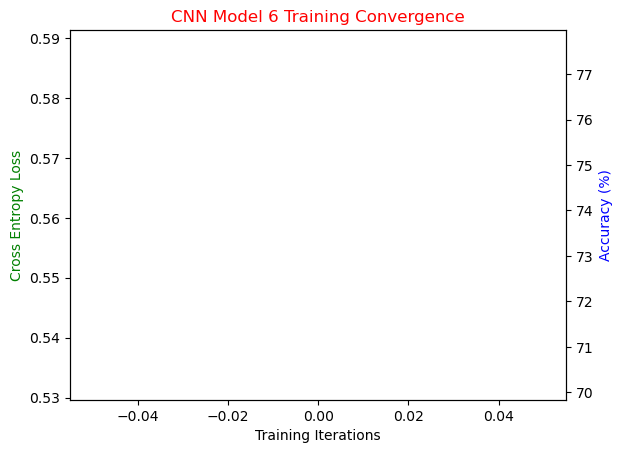

In [67]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, 'g-')
ax2 = ax1.twinx()
ax2.plot(total_accuracy, 'b')
plt.title("CNN Model 6 Training Convergence", color='red')
ax1.set_xlabel("Training Iterations")
ax1.set_ylabel("Cross Entropy Loss", color='g')
ax2.set_ylabel("Accuracy (%)", color='b')
plt.show()

In [68]:
torch.save(model.state_dict(), model_path6)

In [69]:
model_temp = Net6()
model_temp.load_state_dict(torch.load(model_path6))
model_temp= model_temp.to('cuda')

In [70]:
batch_size=1

model_temp.eval()
pred_targets = []
test_targets= []
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model_temp(data.to('cuda'))
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)
        pred = output.argmax(dim=1, keepdim=True)
        pred_targets.append(pred.item())
        test_targets.append(target.item())
        correct += pred.eq(target.to('cuda').view_as(pred)).sum().item()

        loss = loss_func(output, target.to('cuda'))
        total_loss.append(loss.item())

    print(f"Performance on test data:\n\tLoss: {sum(total_loss) / len(total_loss):.4f}\n\tAccuracy: {100 * correct / len(test_loader) / batch_size:.2f}%")
    print(test_targets)
    print(pred_targets)

Performance on test data:
	Loss: 0.3352
	Accuracy: 91.42%
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

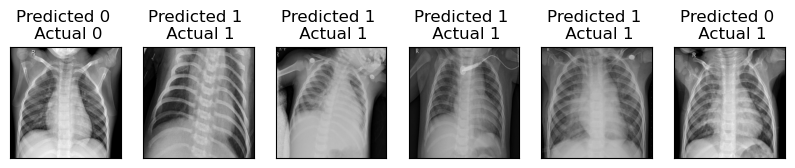

In [71]:
from PIL import Image
#abc
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model_temp.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model_temp(data.to('cuda')[0:1])
        if len(output.shape) == 1:
            output = output.reshape(3, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        test_targets2 = target.item()
        axes[count].imshow(torchvision.transforms.ToPILImage(mode='RGB')(data[0].squeeze()), cmap=plt.cm.rainbow)

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {} \n Actual {}".format(pred.item(),test_targets2))

        count += 1

In [72]:
time_taken = toc-tic

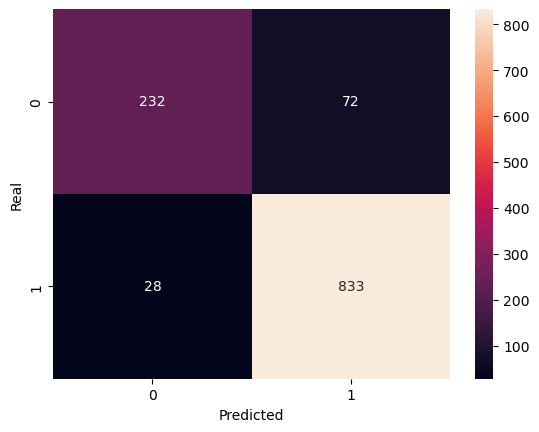

Time taken:  3344.319836139679
Test size: 1165
Total Accuracy:  0.9141630901287554
Total Precision:  0.9204419889502763
Total Recall:  0.967479674796748
Total F1 Score:  0.9433748584371461
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       304
           1       0.92      0.97      0.94       861

    accuracy                           0.91      1165
   macro avg       0.91      0.87      0.88      1165
weighted avg       0.91      0.91      0.91      1165



In [73]:
val_CNN6 = matrix_confusion(test_targets, pred_targets,time_taken)

In [74]:
out6 = pd.DataFrame([val_CNN6],
                   index = ['CNN Model 6'],
                  columns=['Time','Accuracy','Precision','Recall','F1 score'])
out6.sort_values('Time')

,Time,Accuracy,Precision,Recall,F1 score
CNN Model 6,3344.319836,0.914163,0.920442,0.96748,0.943375


# Model 7

In [75]:
torch.cuda.empty_cache()

In [76]:
model = model7.to('cuda')

In [77]:
print(model)

Net7(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv7): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (fc4): Linear(in_features=1, out_features=1, bias=True)
)


In [78]:
summary(model, (3, 640, 640),  device='cuda')

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Conv2d: 1-4                            [-1, 128, 72, 72]         409,728
├─Conv2d: 1-5                            [-1, 128, 32, 32]         409,728
├─Conv2d: 1-6                            [-1, 128, 12, 12]         409,728
├─Conv2d: 1-7                            [-1, 128, 2, 2]           409,728
├─Dropout2d: 1-8                         [-1, 128, 1, 1]           --
├─Linear: 1-9                            [-1, 128]                 16,512
├─Linear: 1-10                           [-1, 2]                   258
├─Linear: 1-11                           [-1, 1]                   3
├─Linear: 1-12                           [-1, 1]                   2
Total params: 2,484,871
Trainable params: 2,484,8

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Conv2d: 1-3                            [-1, 128, 153, 153]       409,728
├─Conv2d: 1-4                            [-1, 128, 72, 72]         409,728
├─Conv2d: 1-5                            [-1, 128, 32, 32]         409,728
├─Conv2d: 1-6                            [-1, 128, 12, 12]         409,728
├─Conv2d: 1-7                            [-1, 128, 2, 2]           409,728
├─Dropout2d: 1-8                         [-1, 128, 1, 1]           --
├─Linear: 1-9                            [-1, 128]                 16,512
├─Linear: 1-10                           [-1, 2]                   258
├─Linear: 1-11                           [-1, 1]                   3
├─Linear: 1-12                           [-1, 1]                   2
Total params: 2,484,871
Trainable params: 2,484,8

In [79]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_func = CrossEntropyLoss().to('cuda')

testing_for_blast = 1
check_six_percent = 0

epochs = 16
model.train()
count = 1
loss_list = []
total_accuracy = []
model_path7 = 'C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Models/CNN_Chest_model7.pt'
tic = time.time()
for epoch in range(epochs):
    correct = 0
    total_loss = []
    batch_size = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        batch_size+=1
        optimizer.zero_grad(set_to_none=True)
        output = model(data.to('cuda'))  # Forward pass, Data to GPU
        loss = loss_func(output, target.to('cuda')) #Labels to GPU
        loss.backward()  # Backward pass
        optimizer.step()
        total_loss.append(loss.item())
        train_pred = output.argmax(dim=1, keepdim=True)
        correct += train_pred.eq(target.to('cuda').view_as(train_pred)).sum().item()
    loss_list.append(sum(total_loss) / len(total_loss))
    accuracy = 100 * correct / 4077 # No. of training examples = 4077
    total_accuracy.append(accuracy)
    if ((100*(epoch+1))//epochs)//(count*10) >0 :
      count+=1
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path7)
    print(f"Training [{100.0 * (epoch + 1) / epochs:.0f}%]\tLoss: {loss_list[-1]:.4f}\tAccuracy: {accuracy:.2f}%")
    if check_six_percent == 0:
      check_six_percent=1
      print(f"Training [{100.0 * (epoch + 1) / epochs:.2f}%]\t Time Taken: {time.time()-tic:.2f} seconds")
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path7)
    if testing_for_blast == 1:
      break
toc = time.time()

Training [6%]	Loss: 0.6201	Accuracy: 69.73%
Training [6.25%]	 Time Taken: 3661.62 seconds
Saving model with test loss of 69.733


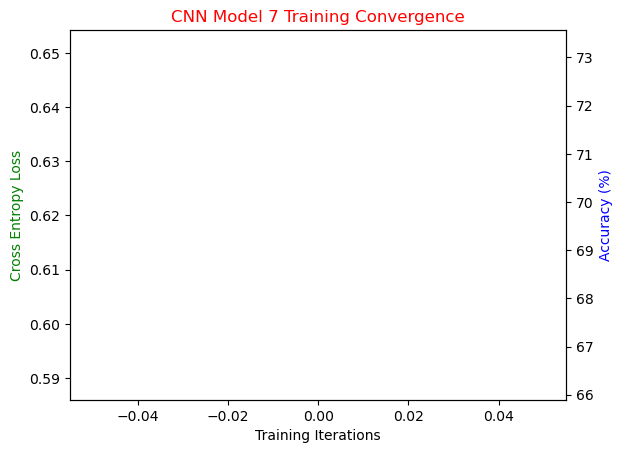

In [80]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, 'g-')
ax2 = ax1.twinx()
ax2.plot(total_accuracy, 'b')
plt.title("CNN Model 7 Training Convergence", color='red')
ax1.set_xlabel("Training Iterations")
ax1.set_ylabel("Cross Entropy Loss", color='g')
ax2.set_ylabel("Accuracy (%)", color='b')
plt.show()

In [81]:
torch.save(model.state_dict(), model_path7)

In [82]:
model_temp = Net7()
model_temp.load_state_dict(torch.load(model_path7))
model_temp= model_temp.to('cuda')

In [83]:
batch_size=1

model_temp.eval()
pred_targets = []
test_targets= []
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model_temp(data.to('cuda'))
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)
        pred = output.argmax(dim=1, keepdim=True)
        pred_targets.append(pred.item())
        test_targets.append(target.item())
        correct += pred.eq(target.to('cuda').view_as(pred)).sum().item()

        loss = loss_func(output, target.to('cuda'))
        total_loss.append(loss.item())

    print(f"Performance on test data:\n\tLoss: {sum(total_loss) / len(total_loss):.4f}\n\tAccuracy: {100 * correct / len(test_loader) / batch_size:.2f}%")
    print(test_targets)
    print(pred_targets)

Performance on test data:
	Loss: 0.5746
	Accuracy: 73.91%
[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

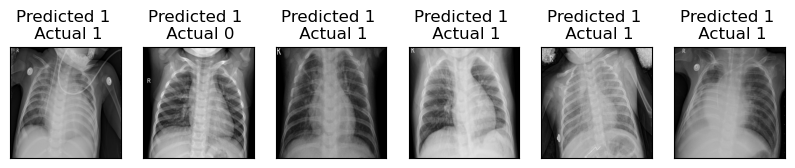

In [84]:
from PIL import Image
#abc
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model_temp.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model_temp(data.to('cuda')[0:1])
        if len(output.shape) == 1:
            output = output.reshape(3, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        test_targets2 = target.item()
        axes[count].imshow(torchvision.transforms.ToPILImage(mode='RGB')(data[0].squeeze()), cmap=plt.cm.rainbow)

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {} \n Actual {}".format(pred.item(),test_targets2))

        count += 1

In [85]:
time_taken = toc-tic

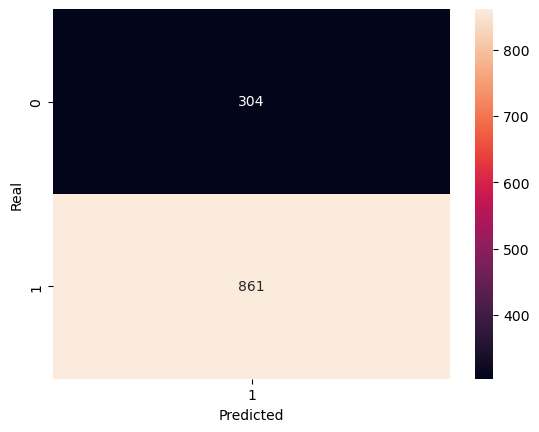

Time taken:  3661.6278860569
Test size: 1165
Total Accuracy:  0.7390557939914163
Total Precision:  0.7390557939914163
Total Recall:  1.0
Total F1 Score:  0.8499506416584404
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       304
           1       0.74      1.00      0.85       861

    accuracy                           0.74      1165
   macro avg       0.37      0.50      0.42      1165
weighted avg       0.55      0.74      0.63      1165



c:\Users\rjuya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rjuya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rjuya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
val_CNN7 = matrix_confusion(test_targets, pred_targets,time_taken)

In [87]:
out7 = pd.DataFrame([val_CNN7],
                   index = ['CNN Model 7'],
                  columns=['Time','Accuracy','Precision','Recall','F1 score'])
out7.sort_values('Time')

,Time,Accuracy,Precision,Recall,F1 score
CNN Model 7,3661.627886,0.739056,0.739056,1.0,0.849951


In [88]:
out = pd.DataFrame([val_CNN3,val_CNN4,val_CNN5,val_CNN6,val_CNN7],
                   index = ['CNN Model 3','CNN Model 4','CNN Model 5','CNN Model 6','CNN Model 7'],
                  columns=['Time','Accuracy','Precision','Recall','F1 score'])
out.sort_values('Time')

,Time,Accuracy,Precision,Recall,F1 score
CNN Model 6,3344.319836,0.914163,0.920442,0.967480,0.943375
CNN Model 5,3392.674581,0.890129,0.954151,0.894309,0.923261
CNN Model 7,3661.627886,0.739056,0.739056,1.000000,0.849951
CNN Model 3,10939.655208,0.959657,0.969977,0.975610,0.972785
CNN Model 4,52804.279888,0.962232,0.971165,0.977933,0.974537


In [106]:
import pickle

In [153]:
filepath1 = 'C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Models/output.pickle'
with open(filepath1, 'wb') as file:
    # Serialize and write the variable to the file
    pickle.dump(out, file)
    print("Data Stored Successfully")

Data Stored Successfully


# Model 2

In [147]:
import gc

In [148]:
model = None
gc.collect()
del model
torch.cuda.empty_cache()

In [149]:
model = model2.to('cuda')

In [150]:
print(model)

Net2(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=3155072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (fc4): Linear(in_features=1, out_features=1, bias=True)
)


In [151]:
summary(model, (3, 640, 640),  device='cuda')

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Dropout2d: 1-3                         [-1, 128, 157, 157]       --
├─Linear: 1-4                            [-1, 128]                 403,849,344
├─Linear: 1-5                            [-1, 2]                   258
├─Linear: 1-6                            [-1, 1]                   3
├─Linear: 1-7                            [-1, 1]                   2
Total params: 404,269,063
Trainable params: 404,269,063
Non-trainable params: 0
Total mult-adds (G): 44.67
Input size (MB): 4.69
Forward/backward pass size (MB): 491.30
Params size (MB): 1542.16
Estimated Total Size (MB): 2038.15


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 128, 636, 636]       9,728
├─Conv2d: 1-2                            [-1, 128, 314, 314]       409,728
├─Dropout2d: 1-3                         [-1, 128, 157, 157]       --
├─Linear: 1-4                            [-1, 128]                 403,849,344
├─Linear: 1-5                            [-1, 2]                   258
├─Linear: 1-6                            [-1, 1]                   3
├─Linear: 1-7                            [-1, 1]                   2
Total params: 404,269,063
Trainable params: 404,269,063
Non-trainable params: 0
Total mult-adds (G): 44.67
Input size (MB): 4.69
Forward/backward pass size (MB): 491.30
Params size (MB): 1542.16
Estimated Total Size (MB): 2038.15

In [152]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_func = CrossEntropyLoss().to('cuda')
testing_for_blast = 1
check_six_percent = 0
epochs = 16
model.train()
count = 1
loss_list = []
total_accuracy = []
model_path2 = 'C:/Users/rjuya/OneDrive/Desktop/github stuff/EE5610/Project/Models/CNN_Chest_model2.pt'
tic = time.time()
for epoch in range(epochs):
    correct = 0
    total_loss = []
    batch_size = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        batch_size+=1
        optimizer.zero_grad(set_to_none=True)
        output = model(data.to('cuda'))  # Forward pass, Data to GPU
        loss = loss_func(output, target.to('cuda')) #Labels to GPU
        loss.backward()  # Backward pass
        optimizer.step()
        total_loss.append(loss.item())
        train_pred = output.argmax(dim=1, keepdim=True)
        correct += train_pred.eq(target.to('cuda').view_as(train_pred)).sum().item()
    loss_list.append(sum(total_loss) / len(total_loss))
    accuracy = 100 * correct / 4077 # No. of training examples = 4077
    total_accuracy.append(accuracy)
    if ((100*(epoch+1))//epochs)//(count*10) >0 :
      count+=1
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path2)
    print(f"Training [{100.0 * (epoch + 1) / epochs:.0f}%]\tLoss: {loss_list[-1]:.4f}\tAccuracy: {accuracy:.2f}%")
    if check_six_percent == 0:
      check_six_percent=1
      print(f"Training [{100.0 * (epoch + 1) / epochs:.2f}%]\t Time Taken: {time.time()-tic:.2f} seconds")
      print('Saving model with test loss of {:.3f}'.format(total_accuracy[-1]))
      torch.save(model.state_dict(), model_path2)
    if testing_for_blast == 1:
      break

toc = time.time()

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.54 GiB. GPU 0 has a total capacty of 8.00 GiB of which 0 bytes is free. Of the allocated memory 7.51 GiB is allocated by PyTorch, and 4.54 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

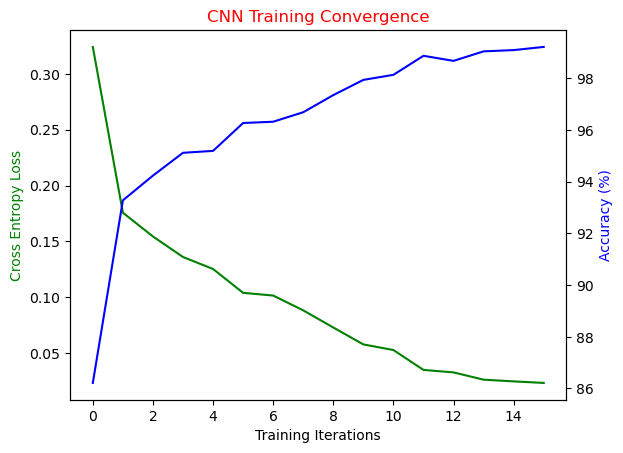

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, 'g-')
ax2 = ax1.twinx()
ax2.plot(total_accuracy, 'b')
plt.title("CNN Model 2 Training Convergence", color='red')
ax1.set_xlabel("Training Iterations")
ax1.set_ylabel("Cross Entropy Loss", color='g')
ax2.set_ylabel("Accuracy (%)", color='b')
plt.show()

In [ ]:
torch.save(model.state_dict(), model_path2)

In [ ]:
model_temp = Net2()
model_temp.load_state_dict(torch.load(model_path2))
model_temp= model_temp.to('cuda')

In [ ]:
batch_size=1

model_temp.eval()
pred_targets = []
test_targets= []
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model_temp(data.to('cuda'))
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)
        pred = output.argmax(dim=1, keepdim=True)
        pred_targets.append(pred.item())
        test_targets.append(target.item())
        correct += pred.eq(target.to('cuda').view_as(pred)).sum().item()

        loss = loss_func(output, target.to('cuda'))
        total_loss.append(loss.item())

    print(f"Performance on test data:\n\tLoss: {sum(total_loss) / len(total_loss):.4f}\n\tAccuracy: {100 * correct / len(test_loader) / batch_size:.2f}%")
    print(test_targets)
    print(pred_targets)

Performance on test data:
	Loss: 0.1248
	Accuracy: 96.05%
[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,

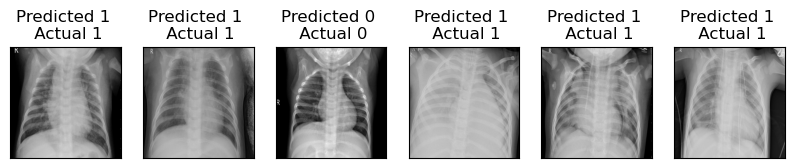

In [ ]:
from PIL import Image
#abc
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model_temp.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model_temp(data.to('cuda')[0:1])
        if len(output.shape) == 1:
            output = output.reshape(3, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        test_targets2 = target.item()
        axes[count].imshow(torchvision.transforms.ToPILImage(mode='RGB')(data[0].squeeze()), cmap=plt.cm.rainbow)

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {} \n Actual {}".format(pred.item(),test_targets2))

        count += 1

In [ ]:
time_taken = toc-tic

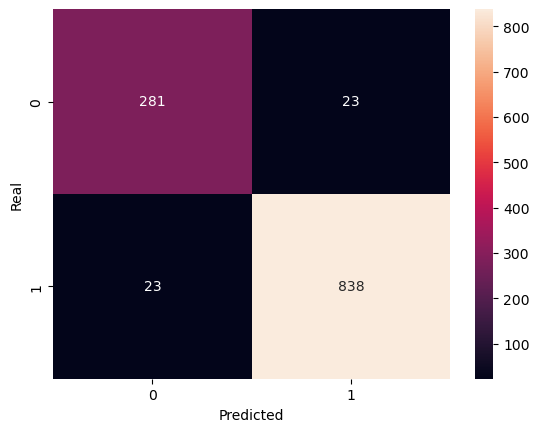

Time taken:  10609.296319246292
Test size: 1165
Total Accuracy:  0.9605150214592275
Total Precision:  0.9732868757259001
Total Recall:  0.9732868757259001
Total F1 Score:  0.9732868757259
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       304
           1       0.97      0.97      0.97       861

    accuracy                           0.96      1165
   macro avg       0.95      0.95      0.95      1165
weighted avg       0.96      0.96      0.96      1165



In [ ]:
val_CNN2 = matrix_confusion(test_targets, pred_targets,time_taken)

In [ ]:
out2 = pd.DataFrame([val_CNN2],
                   index = ['CNN Model 2'],
                  columns=['Time','Accuracy','Precision','Recall','F1 score'])
out2.sort_values('Time')

,Time,Accuracy,Precision,Recall,F1 score
CNN,10609.296319,0.960515,0.973287,0.973287,0.973287


In [ ]:
out = pd.DataFrame([val_CNN2,val_CNN3,val_CNN4,val_CNN5,val_CNN6,val_CNN7],
                   index = ['CNN Model 2','CNN Model 3','CNN Model 4','CNN Model 5','CNN Model 6','CNN Model 7'],
                  columns=['Time','Accuracy','Precision','Recall','F1 score'])
out.sort_values('Time')